Change  `fold` and `file1` accordingly and run all the cells. The code will place a .csv with the abundances, errors, and locations in the same fold as where your fits file was.

In [2]:
# some of the usual imports
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [15]:
CWD = os.getcwd()
if os.path.exists("data/allStarCannon-l31c.2.fits"):
    DATA_DIR = os.path.join(CWD, "data")
else:
    DATA_DIR = CWD
    
file1 = "allStarCannon-l31c.2.fits"
hdu_list = fits.open(os.path.join(DATA_DIR, file1))
abun_data = Table(hdu_list[1].data)

In [8]:
cols = abun_data.colnames
myCols = []
myColNames = ["RA_HRS","DEC_DEG"]
for i in range(len(cols)):
    if not ("RAW" in str(cols[i])):
        if ("_H" in str(cols[i])):
            myCols.append(i)
            myColNames.append(str(cols[i]))
        elif ("TEFF" in str(cols[i])) or ("LOGG" in str(cols[i])):
            myCols.append(i)
            myColNames.append(str(cols[i]))



In [9]:

ii = (abun_data['FILENAME'] != '')

print(len(abun_data['APOGEE_ID']))
print(len(abun_data['APOGEE_ID'][ii]))
print(len(abun_data['APOGEE_ID'][ii])/len(abun_data['APOGEE_ID']))

#can parse ratios by error

277371
164074
0.5915326403985998


In [10]:
myArr = np.array(abun_data[:][ii])
newArr = np.zeros([len(abun_data[:][ii]),len(myCols)+2])
print(newArr.shape)

(164074, 48)


In [11]:
for i in range(len(myArr)):
    myrow = myArr[i]
    
    #Parse RA
    locStr = myrow[0]
    raStr = locStr[2:10]
    hrs = int(raStr[0:2])
    mins = int(raStr[2:4])
    secs = int(raStr[4:6])+ int(raStr[6:8])/100.0
    ra = hrs+mins/60.0+secs/3600.0
    #print(ra)
    
    #Parse Dec
    decStr = locStr[10:]

    if decStr[0] == "+":
        decSgn = 1.0
    else:
        decSgn = -1.0
    deg = int(decStr[1:3])*decSgn
    arcMins = int(decStr[3:5])*decSgn
    arcSecs = (int(decStr[5:7])+int(decStr[7])/10.0)*decSgn
    dec = deg+arcMins/60.0+arcSecs/3600.0
    #print(dec)
    
    #Save RA and Dec
    newArr[i,:2] = [ra,dec]
    
    #Save Abundance Values
    k=0
    for j in myCols:
        newArr[i,2+k] = myrow[j]
        k+=1



In [54]:
print(newArr)

[[5.556e-06 7.429e+01 3.728e+03 ... 8.563e-02 2.284e-01 7.214e-02]
 [1.889e-04 5.717e+01 5.009e+03 ... 8.563e-02 2.284e-01 7.214e-02]
 [5.861e-04 6.346e+01 4.657e+03 ... 8.563e-02 2.284e-01 7.214e-02]
 ...
 [2.400e+01 7.930e+01 4.307e+03 ... 8.563e-02 2.284e-01 7.214e-02]
 [2.400e+01 5.701e+01 4.962e+03 ... 8.563e-02 6.550e-01 7.214e-02]
 [2.400e+01 5.743e+01 4.842e+03 ... 8.563e-02 2.284e-01 7.214e-02]]


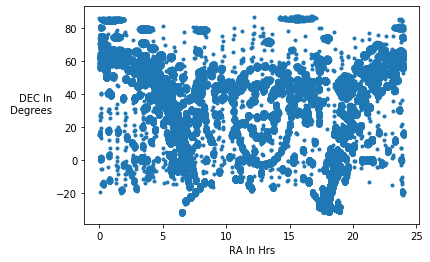

In [12]:
plt.plot(newArr[:,0],newArr[:,1],'.')
plt.xlabel("RA In Hrs")
plt.ylabel("DEC In\n Degrees",rotation=0,ha='right')
plt.show()

In [14]:
saveFile = os.path.join(DATA_DIR, "Cannon.csv")
headStr = ""
for entry in myColNames:
    headStr += entry
    headStr += ','
np.savetxt(saveFile,newArr,delimiter=',',header=headStr)